In [1]:
import pandas as pd
import numpy as np
from disaggregator import config, data, spatial, temporal, plot
import matplotlib.pyplot as plt

# General Settings and functions

## Base year
- By setting the ``base year`` in the ``config.yaml``, you define the year on which the spatial and temporal functions operate
- some functions are not affected, e. g. ``generate_specific_consumption_per_branch()`` because it makes use of particular publications from these years

## Region Codes
- The function ``config.dict_region_code()`` returns a dictionary with conversions of different kinds of region denotation, if ``raw = False``
- the dictionary can convert between the following designations ``ags_lk``, ``id_ags``, ``id_ags_lk``, ``id_nuts3``, ``id_t_nuts3_lk``, ``name``, ``natcode_nuts3``

In [2]:
config.dict_region_code(raw=True)

,ags_lk,id_ags,id_ags_lk,id_nuts3,id_t_nuts3_lk,name,natcode_nuts3
idx,,,,,,,
0,3152,3152000,21,27600021,21,Göttingen,DE915
1,3156,3156000,25,27600025,25,Osterode am Harz,DE919
2,1001,1001000,1,27600001,1,"Flensburg, Kreisfreie Stadt",DEF01
3,1002,1002000,2,27600002,2,"Kiel, Kreisfreie Stadt",DEF02
4,1003,1003000,3,27600003,3,"Lübeck, Kreisfreie Stadt",DEF03
...,...,...,...,...,...,...,...
398,16073,16073000,409,27600409,391,Saalfeld-Rudolstadt,DEG0I
399,16074,16074000,410,27600410,392,Saale-Holzland-Kreis,DEG0J
400,16075,16075000,411,27600411,393,Saale-Orla-Kreis,DEG0K


# Spatial Functions

### Function ``disagg_CTS_industry()``
- returns a DataFrame with absolute gas or electricity consumption per branch and district for the sectors CTS or industry in **MWh** for the ``base year`` (see ``config.yaml``)
- uses files "../data_in/regional/specific_`source`_consumption.csv", with ``source`` being in [``power``, ``gas``], if file does not exist, the function ``generate_specific_consumption_per_branch_and_district()`` is called

In [3]:
df_abs_econ_dis_branch_CTS = spatial.disagg_CTS_industry(source = 'power', sector = 'CTS', use_nuts3code=True) # also possible: source='gas', sector ='industry'
# get dictionary for renaming columns
dic = config.dict_region_code(keys='natcode_nuts3', values='name')
df_abs_econ_dis_branch_CTS.rename(columns=dic).head()

,"Flensburg, Kreisfreie Stadt","Kiel, Kreisfreie Stadt","Lübeck, Kreisfreie Stadt","Neumünster, Kreisfreie Stadt",Dithmarschen,Herzogtum Lauenburg,Nordfriesland,Ostholstein,Pinneberg,Plön,...,Sömmerda,Hildburghausen,Ilm-Kreis,Weimarer Land,Sonneberg,Saalfeld-Rudolstadt,Saale-Holzland-Kreis,Saale-Orla-Kreis,Greiz,Altenburger Land
WZ,,,,,,,,,,,,,,,,,,,,,
1,278.613484,1243.044776,1928.862583,3664.838908,31504.755524,14012.017687,25482.417904,18752.830669,42542.135861,14745.082858,...,24046.486870,14151.605925,9935.120169,18474.217185,3879.156973,14980.832729,27882.780229,29425.870296,20107.112173,15880.968601
2,0.000000,49.822825,54.430913,0.000000,18.696504,971.732113,8.064970,84.670308,67.871916,435.447300,...,19.956501,290.439081,275.892430,107.256266,1264.816441,229.819408,24.705839,532.213367,199.857928,0.000000
3,0.000000,0.000000,1081.912997,0.000000,2615.861858,104.510318,4613.429094,1046.344743,356.329406,713.416870,...,0.000000,36.658340,93.914547,0.000000,0.000000,441.283998,147.408823,332.927873,0.000000,0.000000
36,0.000000,16917.988254,0.000000,0.000000,0.000000,8190.370493,3498.114316,5837.385789,10491.334771,0.000000,...,8655.968414,2872.877928,7359.990418,4905.756829,40296.263099,23418.305060,2620.079185,6435.012265,15715.617801,14532.732944
37,13045.394931,1593.907460,0.000000,8210.603187,2254.487844,19668.618823,8526.395617,2432.355116,11636.024520,3606.288363,...,3606.818157,0.000000,3066.802673,6000.056175,2870.711796,2684.235657,1489.556858,2681.377515,0.000000,4722.459548


(<Figure size 302.4x475.2 with 2 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000004DB9F9EA90>]],
       dtype=object))

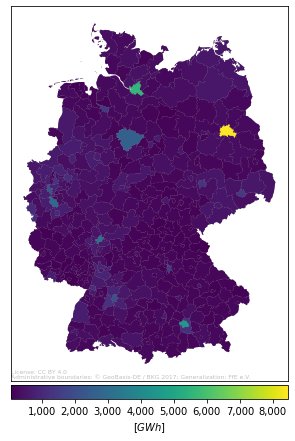

In [4]:
plot.choropleth_map(df_abs_econ_dis_branch_CTS.sum()/1000, relative = False, unit = 'GWh')

### Function ``generate_specific_consumption_per_branch_and_district()``
- Returns specific power and gas consumption per branch and district.
- saves result in ``../data_in/regional/specific_power_consumption.csv`` and ``../data_in/specific_gas_consumption.csv``
- Takes number of iterations as arguments, 8 is recommended. Look at docstring for clarification.

In [5]:
df_spec_econ_district, df_spec_gcon_district = data.generate_specific_consumption_per_branch_and_district(8,8)

In [6]:
df_spec_econ_district.head()

,1001,1002,1003,1004,1051,1053,1054,1055,1056,1057,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
1,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,...,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806,21.431806
2,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,...,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879,6.047879
3,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,...,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125,47.561125
5,167.180743,238.494784,138.232790,144.713079,1001.644188,155.656725,400.074771,252.001533,235.649094,400.074771,...,400.074771,299.714927,400.074771,400.074771,400.074771,898.696747,225.113494,458.380276,223.771238,400.074771
6,76.647782,109.343313,63.375940,66.346975,459.226368,71.364336,183.423302,115.535786,108.038642,183.423302,...,183.423302,137.411068,183.423302,183.423302,183.423302,412.027792,103.208358,210.154776,102.592971,183.423302


In [7]:
df_spec_gcon_district.head()

,1001,1002,1003,1004,1051,1053,1054,1055,1056,1057,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
1,6.736410,6.736410,6.736410,6.736410,6.736410,6.736410,6.736410,6.736410,6.736410,6.736410,...,6.736410,6.736410,6.736410,6.736410,6.736410,6.736410,6.736410,6.736410,6.736410,6.736410
2,0.008478,0.008478,0.008478,0.008478,0.008478,0.008478,0.008478,0.008478,0.008478,0.008478,...,0.008478,0.008478,0.008478,0.008478,0.008478,0.008478,0.008478,0.008478,0.008478,0.008478
3,0.007103,0.007103,0.007103,0.007103,0.007103,0.007103,0.007103,0.007103,0.007103,0.007103,...,0.007103,0.007103,0.007103,0.007103,0.007103,0.007103,0.007103,0.007103,0.007103,0.007103
5,11.154951,11.154951,11.154951,11.154951,45.327550,11.154951,14.122494,14.122494,17.267132,14.122494,...,11.154951,11.154951,11.465445,11.154951,21.240471,13.777111,11.154951,11.154951,11.154951,11.154951
6,428.334392,198.598526,221.583619,270.955301,2294.159525,96.754835,714.780613,714.780613,873.939905,714.780613,...,268.890689,253.061313,580.299626,285.562813,1075.042201,697.299797,344.549566,399.374712,340.860342,323.162319


### Function ``generate_specific_consumption_per_branch()``
- this function is the basis for ``generate_specific_consumption_per_branch_and_district()``
- it returns number of employees, as well as absolute and specific power and gas consumption per industry and CTS branch (WZ08) in Germany for the year 2015
- the values are based on the publication [Umweltökonomische Gesamtrechnung, 2017](https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Umwelt/Publikationen/Umweltnutzung-Wirtschaft/umweltnutzung-und-wirtschaft-energie-pdf-5850014.html) for 2015, which is also available from the DemandRegio database (table_id = 38) with some industry branches (WZ) being grouped together and with ET = 12 for gas and ET = 18 for electricity)


In [8]:
df_spez_econ, df_spez_gcon, df_abs_con, df_emp = data.generate_specific_consumption_per_branch()

In [9]:
## specific electricity consumption 
df_spez_econ.head()
## specific gas consumption 
df_spez_gcon.head()

,spez. GV
1,6.736410
2,0.008478
3,0.007103
5,58.078803
6,778.569888


In [10]:
## employees by branch and district
df_emp.head()
## absolute consumption as in "Umweltökonomischer Gesamtrechnung" for the year 2015, in Database dimension='spatial', table_id=38,
df_abs_con.head()

,value,WZ,ET
idx,,,
19,1.547398e+06,1,12
23,4.923029e+06,1,18
30,1.657324e+02,2,12
33,1.182279e+05,2,18
39,1.765487e+01,3,12


### Function ``employees_per_branch_district()``
- Read, transform and return the number of employees per NUTS-3 area and branch for a given year


In [11]:
df_employees = data.employees_per_branch_district(year = 2016)
df_employees.head()

ags,1001,1002,1003,1004,1051,1053,1054,1055,1056,1057,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
WZ,,,,,,,,,,,,,,,,,,,,,
1,12.0,57.000000,89.000000,165.048837,1555.000000,635.000000,1193.935134,930.0,1931.000000,733.365613,...,1066.000000,641.000000,459.000000,805.0,178.000000,687.000000,1310.000000,1301.977198,923.0,711.0
2,0.0,8.829132,7.000000,0.000000,3.074138,161.000000,1.278226,15.0,11.418690,69.563809,...,4.016232,45.000000,48.000000,19.0,213.774999,38.000000,5.000000,116.121597,33.0,0.0
3,0.0,0.000000,23.675835,0.000000,50.000000,2.677613,98.056052,29.0,7.116517,14.772749,...,0.000000,0.231578,2.571744,0.0,0.000000,9.644818,3.059019,6.866084,0.0,0.0
5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,103.885849,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
6,0.0,0.000000,0.000000,0.000000,144.633221,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0


### Function ``energy_balance_values()``
- Read, transform and return information from german federal energy balances (LAK) for each federal state for the base year
- available at the DemandRegio Database, table_id: 59


In [ ]:
df_LAK = data.energy_balance_values(internal_id = [52,29])

# Temporal Functions

### Function disagg_temporal_power_CTS()
- Disagreggate spatial data of CTS' **power** demand temporally in **MWh**
- returns DataFrame with districts as columns and timesteps as rows 
- if ``detailed = True``, returns DataFrame with multiindex in columns with ``level=0`` for districts and ``level=1`` for branches, timesteps as rows
- Uses temporal and spatial functions `disagg_CTS('power')` , `CTS_power_slp_generator` and information from `config.py`

In [9]:
df_CTS = temporal.disagg_temporal_power_CTS(detailed = False, use_nuts3code=True)

disaggregator.temporal: INFO     Working on state: SH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NI.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HB.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NW.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggrega

In [10]:
df_CTS.head()

,DEF01,DEF02,DEF03,DEF04,DEF05,DEF06,DEF07,DEF08,DEF09,DEF0A,...,DEG0D,DEG0E,DEG0F,DEG0G,DEG0H,DEG0I,DEG0J,DEG0K,DEG0L,DEG0M
2015-01-01 00:00:00,3.115564,8.379840,6.026278,2.727286,3.642590,3.686675,5.439147,5.122272,6.617861,2.154296,...,1.834572,1.247310,2.339211,1.945665,1.869235,2.747839,2.046323,2.031765,2.400117,2.177006
2015-01-01 00:15:00,3.272524,8.954310,6.343744,2.895361,3.784762,3.837316,5.734542,5.401852,6.876733,2.259250,...,1.873499,1.275523,2.423719,1.999271,1.934031,2.857229,2.091217,2.073656,2.464980,2.240333
2015-01-01 00:30:00,3.185879,8.686477,6.161881,2.814476,3.678429,3.743681,5.513620,5.203116,6.684633,2.182117,...,1.829904,1.242645,2.365671,1.948543,1.907598,2.791247,2.037906,2.015934,2.411546,2.193227
2015-01-01 00:45:00,3.109915,8.458016,6.000229,2.743821,3.586475,3.662532,5.309586,5.017806,6.517762,2.113354,...,1.794044,1.214799,2.316215,1.905113,1.886801,2.735422,1.993336,1.967264,2.367216,2.154155
2015-01-01 01:00:00,3.053411,8.291141,5.875231,2.690501,3.515937,3.602490,5.136775,4.859782,6.390216,2.057655,...,1.768597,1.194038,2.280938,1.872580,1.875832,2.695362,1.960433,1.930250,2.336541,2.127334


In [11]:
# export your data using
df_CTS.to_csv('./data_out/CTS_Power_2015_MWh.csv')

(<Figure size 864x216 with 2 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000059042452E8>]],
       dtype=object))

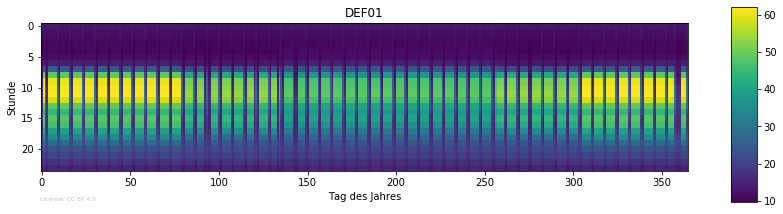

In [17]:
# or plot your data using
plot.heatmap_timeseries(df_CTS['DEF01'].resample('H').sum(), unit = 'MWh')

(<Figure size 302.4x475.2 with 2 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000059055199B0>]],
       dtype=object))

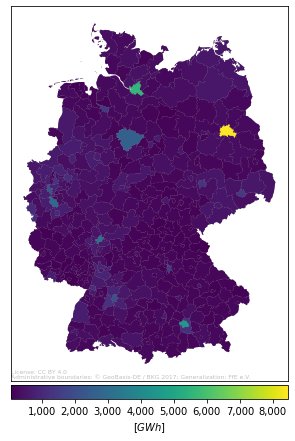

In [22]:
plot.choropleth_map(df_CTS.sum(axis=0)/1000, unit = "GWh", relative=False)

#### or use detailed Version of the function

In [23]:
df_CTS_detail = temporal.disagg_temporal_power_CTS(detailed = True, use_nuts3code=True)

disaggregator.temporal: INFO     Working on state: SH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NI.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HB.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NW.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggrega

In [42]:
# filter your results using multiindex
df_lk_DEF01 = df_CTS_detail.loc[:, 'DEF01']
df_lk_DEF01.head()

WZ,1,2,81,3,36,37,38,39,49,50,...,91,55,56,87,92,93,88,97,98,94
2015-01-01 00:00:00,0.005035,0.0,0.011680,0.0,0.0,0.279572,0.003571,0.0,0.343933,7.841506e-07,...,0.004717,0.038908,0.221993,0.084544,0.011768,0.027650,0.141953,0.004224,0.0,0.066772
2015-01-01 00:15:00,0.004757,0.0,0.011033,0.0,0.0,0.285756,0.003650,0.0,0.351541,8.014951e-07,...,0.005062,0.042482,0.242383,0.092309,0.012849,0.030189,0.169684,0.005050,0.0,0.098344
2015-01-01 00:30:00,0.004597,0.0,0.010662,0.0,0.0,0.287383,0.003671,0.0,0.353543,8.060594e-07,...,0.004885,0.039600,0.225939,0.086047,0.011977,0.028141,0.157273,0.004680,0.0,0.089323
2015-01-01 00:45:00,0.004478,0.0,0.010387,0.0,0.0,0.289661,0.003700,0.0,0.356345,8.124494e-07,...,0.004717,0.036660,0.209166,0.079659,0.011088,0.026052,0.145443,0.004328,0.0,0.081774
2015-01-01 01:00:00,0.004388,0.0,0.010177,0.0,0.0,0.293241,0.003746,0.0,0.360750,8.224909e-07,...,0.004565,0.033836,0.193051,0.073522,0.010234,0.024045,0.134002,0.003988,0.0,0.075891


In [41]:
# use DataFrame.reorder_levels to filter for CTS branches
df_wz_81 = df_CTS_detail.reorder_levels([1,0], axis=1).loc[:,81]
df_wz_81.head()

LK,DEF01,DEF02,DEF03,DEF04,DEF05,DEF06,DEF07,DEF08,DEF09,DEF0A,...,DEG0D,DEG0E,DEG0F,DEG0G,DEG0H,DEG0I,DEG0J,DEG0K,DEG0L,DEG0M
2015-01-01 00:00:00,0.011680,0.048792,0.056588,0.006384,0.007781,0.012692,0.016063,0.018931,0.037863,0.010812,...,0.004207,0.007543,0.007303,0.010061,0.002015,0.009326,0.007311,0.006664,0.006658,0.006163
2015-01-01 00:15:00,0.011033,0.046093,0.053458,0.006031,0.007351,0.011990,0.015174,0.017884,0.035768,0.010213,...,0.003974,0.007126,0.006899,0.009505,0.001904,0.008810,0.006906,0.006295,0.006289,0.005822
2015-01-01 00:30:00,0.010662,0.044541,0.051657,0.005828,0.007103,0.011586,0.014663,0.017282,0.034564,0.009870,...,0.003840,0.006886,0.006667,0.009185,0.001840,0.008513,0.006674,0.006083,0.006077,0.005626
2015-01-01 00:45:00,0.010387,0.043393,0.050327,0.005678,0.006920,0.011288,0.014286,0.016837,0.033673,0.009615,...,0.003741,0.006709,0.006495,0.008948,0.001792,0.008294,0.006502,0.005926,0.005921,0.005481
2015-01-01 01:00:00,0.010177,0.042516,0.049309,0.005563,0.006781,0.011060,0.013997,0.016496,0.032993,0.009421,...,0.003666,0.006573,0.006364,0.008767,0.001756,0.008126,0.006370,0.005806,0.005801,0.005371


### Function disagg_temporal_gas_CTS()
- Disagreggate spatial data of CTS' gas demand per hour for a given `state` in **MWh**
- Uses temporal and spatial functions like `disagg_daily_gas_slp(state)` and information from `config.py` and `./data_in/Gas Load Profiles/`
- Takes about **5-8 minutes** to run

In [4]:
# run function for single state
df_gas_cts_HB = temporal.disagg_temporal_gas_CTS('HB', use_nuts3code=True)
df_gas_cts_HB.head()

disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.


ags_lk,DE501,DE502
2015-01-01 00:00:00,198.553059,36.751911
2015-01-01 01:00:00,192.783908,35.709588
2015-01-01 02:00:00,186.987274,34.939035
2015-01-01 03:00:00,211.159525,39.004293
2015-01-01 04:00:00,263.514422,47.414021


In [4]:
# save your data
df_gas_cts_HB.to_csv('./data_out/CTS_Gas_2015_MWh_HB.csv')

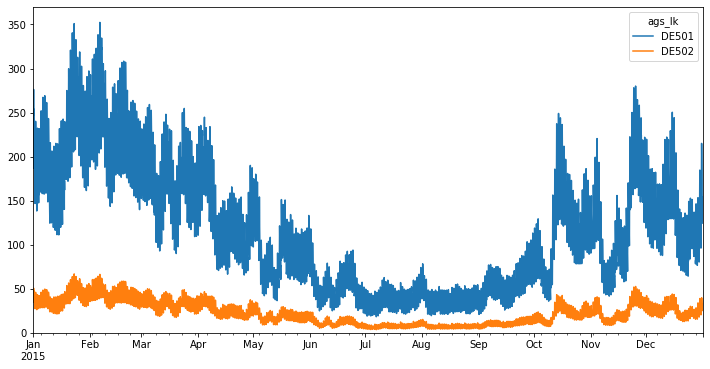

In [5]:
# plot your data
df_gas_cts_HB.plot(figsize=(12,6), ylim = 0)

In [13]:
# or run function for all states
for state in config.bl_dict().values():
    df = temporal.disagg_temporal_gas_CTS(state)
    df.to_csv('./data_out/CTS_Gas_2015_MWh_' + state + '.csv')

disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggre

### Function disagg_daily_gas_slp()
- Disagreggate spatial data of CTS' gas demand per hour for a given `state` in MWh
- returns `DataFrame`with gas demand and column names as *district_SLPname_CTSbranch*
- Uses temporal and spatial functions `disagg_CTS('gas')` , `gas_slp_weekday_params()`, `h_value()` and information from `config.py`
- Takes about **5-6 minutes** to run

In [14]:
df_daily_gas_BE = temporal.disagg_daily_gas_slp('BE')
df_daily_gas_BE.head()

disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.data: INFO     Dropping old NUTS-v2013 regions.


,11000_GB_1,11000_GB_2,11000_GB_3,11000_GA_36,11000_GA_37,11000_GA_49,11000_GA_50,11000_GA_51,11000_GA_52,11000_GA_56,...,11000_KO_72,11000_KO_73,11000_KO_78,11000_KO_84,11000_KO_85,11000_KO_87,11000_KO_91,11000_KO_93,11000_KO_94,11000_KO_99
2015-01-01 00:00:00+01:00,12.598344,0.000961,0.001750,2.185668,0.731534,1311.929639,0.007805,16.240837,185.890343,1371.969420,...,390.405744,212.467668,217.849730,2810.677428,4322.763140,839.135609,121.960329,220.786168,1317.915036,66.093519
2015-01-02 00:00:00+01:00,12.389754,0.000945,0.001721,2.158059,0.722293,1295.357206,0.007706,16.035681,183.542157,1354.638558,...,384.686610,209.355186,214.658405,2769.503241,4259.438102,826.842941,120.173708,217.551826,1298.608630,65.125302
2015-01-03 00:00:00+01:00,11.416186,0.000871,0.001586,2.028477,0.678923,1217.576516,0.007244,15.072806,172.521231,1273.298275,...,357.664730,194.649265,199.579965,2574.962589,3960.238646,768.762285,111.732240,202.270142,1207.389322,60.550648
2015-01-04 00:00:00+01:00,11.863834,0.000905,0.001648,2.088204,0.698914,1253.427715,0.007457,15.516621,177.601070,1310.790185,...,370.156188,201.447400,206.550305,2664.893276,4098.550161,795.611343,115.634494,209.334436,1249.557449,62.665382
2015-01-05 00:00:00+01:00,12.317556,0.000940,0.001711,2.148490,0.719091,1289.613371,0.007672,15.964576,182.728299,1348.631860,...,382.701230,208.274697,213.550546,2755.209744,4237.455002,822.575577,119.553487,216.429034,1291.906468,64.789188


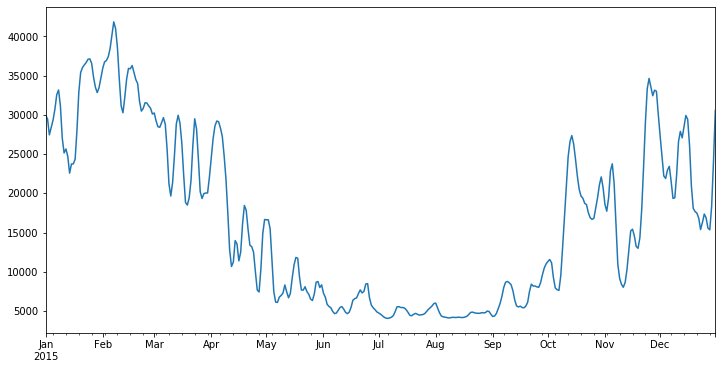

In [12]:
df_daily_gas_BE.sum(axis=1).plot(figsize=(12,6))

### Function disagg_temporal_industry()
- Disagreggate spatial data of industry **power** and **gas** demand per hour for all districts in **MWh**
- returns DataFrame with districts as columns and timesteps as rows
- if detailed = True, returns DataFrame with multiindex in columns with level=0 for districts and level=1 for branches, timesteps as rows
- power level has 2 levels according to shift, with the lower level being set by ``low``, default is 0.35, meaning that the lower level is 35% of the higher level
- Uses temporal and spatial functions like `shift_load_profile_generator()`, `disagg_CTS_industry()` and information from `config.py`

In [46]:
df_gas_industry = temporal.disagg_temporal_industry(source='gas', detailed=False, use_nuts3code=False, low=0.35)

disaggregator.temporal: INFO     Working on state: SH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NI.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HB.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NW.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggrega

In [47]:
df_gas_industry.head()

,1001,1002,1003,1004,1051,1053,1054,1055,1056,1057,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
2015-01-01 00:00:00,5.048063,2.918361,4.755429,3.493381,54.434832,1.735306,1.51121,3.320147,19.158797,1.185211,...,2.901728,2.902754,5.923122,1.883349,11.319816,10.634086,4.507188,6.381072,3.705415,2.297518
2015-01-01 00:15:00,5.048063,2.918361,4.755429,3.493381,54.434832,1.735306,1.51121,3.320147,19.158797,1.185211,...,2.901728,2.902754,5.923122,1.883349,11.319816,10.634086,4.507188,6.381072,3.705415,2.297518
2015-01-01 00:30:00,5.048063,2.918361,4.755429,3.493381,54.434832,1.735306,1.51121,3.320147,19.158797,1.185211,...,2.901728,2.902754,5.923122,1.883349,11.319816,10.634086,4.507188,6.381072,3.705415,2.297518
2015-01-01 00:45:00,5.048063,2.918361,4.755429,3.493381,54.434832,1.735306,1.51121,3.320147,19.158797,1.185211,...,2.901728,2.902754,5.923122,1.883349,11.319816,10.634086,4.507188,6.381072,3.705415,2.297518
2015-01-01 01:00:00,5.048063,2.918361,4.755429,3.493381,54.434832,1.735306,1.51121,3.320147,19.158797,1.185211,...,2.901728,2.902754,5.923122,1.883349,11.319816,10.634086,4.507188,6.381072,3.705415,2.297518


In [48]:
# export your data using
df_gas_industry.to_csv('./data_out/Industry_Gas_2015_MWh.csv')

(<Figure size 864x216 with 2 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000005913A2E2B0>]],
       dtype=object))

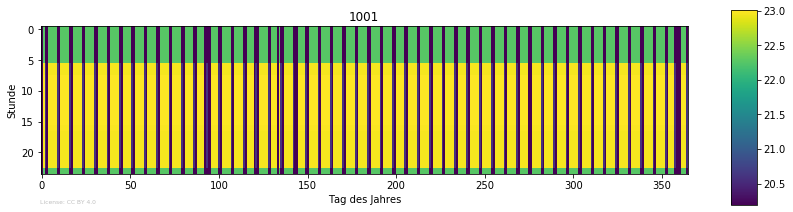

In [49]:
plot.heatmap_timeseries(df_gas_industry[1001].resample('H').sum(), unit = 'MWh')

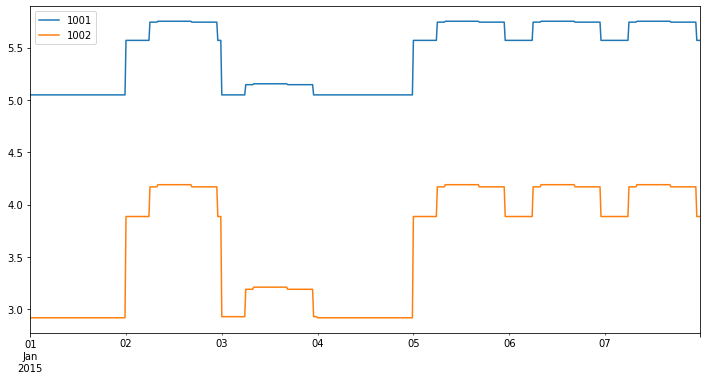

In [50]:
df_gas_industry.loc[:,[1001, 1002]].head(672).plot(figsize=(12,6))

### Function shift_load_profile_generator()
- calculates normalized shift load profiles for industry
- S1, S2, S3 meaning shifts from 8:00 to 16:30, 06:00 to 23:00 and continously respectively
- WT, WT_SA, and WT_SA_SO meaning working on weekdays only (holidays excluded), weekdays + saturdays (holidays excluded), all the time
- shift has 2 levels, with the lower level being 35% of the higher level

In [10]:
df_workshift = data.shift_load_profile_generator('BE')

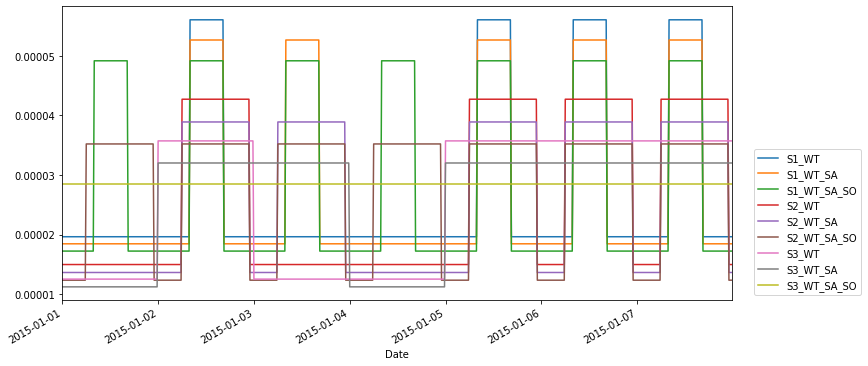

In [31]:
fig, ax = plt.subplots(figsize=(12,6))

df_workshift.head(672).plot(ax=ax)
ax.legend(loc=4, bbox_to_anchor=(1.2,0))

### Function CTS_power_slp_generator()
-  returns the electric standard load profiles in normalized units ('normalized' means here that the sum over all time steps equals one)
- takes information from `./data_in/Power Load Profiles/`

In [9]:
df_power_slp = data.CTS_power_slp_generator('BE')

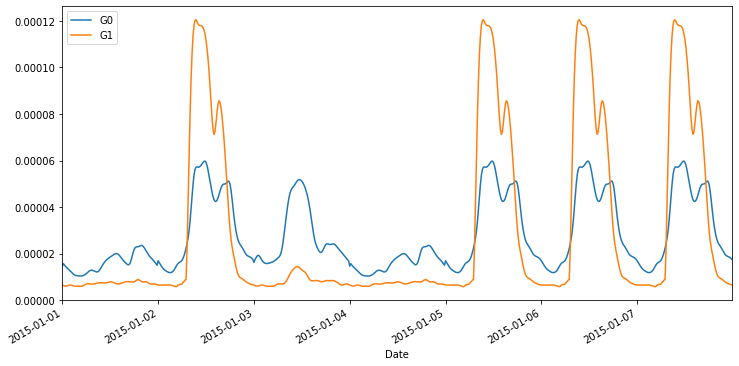

In [10]:
df_power_slp[['G0', 'G1']].head(672).plot(figsize=(12,6), ylim = 0)

In [11]:
df_power_slp

,Tag,Stunde,DayOfYear,WT,SA,SO,WIZ,SOZ,UEZ,H0,L0,L1,L2,G0,G1,G2,G3,G4,G5,G6
Date,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,2015-01-01,00:00:00,1,False,False,True,True,False,False,0.000018,0.000018,0.000017,0.000019,0.000015,0.000007,0.000017,0.000021,0.000014,0.000009,0.000017
2015-01-01 00:15:00+01:00,2015-01-01,00:15:00,1,False,False,True,True,False,False,0.000022,0.000017,0.000016,0.000017,0.000016,0.000006,0.000018,0.000022,0.000014,0.000010,0.000025
2015-01-01 00:30:00+01:00,2015-01-01,00:30:00,1,False,False,True,True,False,False,0.000020,0.000016,0.000016,0.000017,0.000015,0.000006,0.000017,0.000022,0.000014,0.000010,0.000023
2015-01-01 00:45:00+01:00,2015-01-01,00:45:00,1,False,False,True,True,False,False,0.000019,0.000016,0.000015,0.000016,0.000015,0.000006,0.000016,0.000022,0.000014,0.000009,0.000021
2015-01-01 01:00:00+01:00,2015-01-01,01:00:00,1,False,False,True,True,False,False,0.000017,0.000016,0.000015,0.000016,0.000014,0.000006,0.000015,0.000022,0.000013,0.000010,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 22:45:00+01:00,2015-12-31,22:45:00,365,False,True,False,True,False,False,0.000030,0.000023,0.000020,0.000025,0.000019,0.000007,0.000029,0.000023,0.000015,0.000010,0.000044
2015-12-31 23:00:00+01:00,2015-12-31,23:00:00,365,False,True,False,True,False,False,0.000030,0.000022,0.000020,0.000023,0.000018,0.000007,0.000026,0.000023,0.000015,0.000010,0.000040
2015-12-31 23:15:00+01:00,2015-12-31,23:15:00,365,False,True,False,True,False,False,0.000028,0.000021,0.000019,0.000022,0.000018,0.000007,0.000023,0.000022,0.000015,0.000010,0.000037


### Function gas_slp_weekday_params()
- returns the weekday-parameters ("Wochentagsfaktoren") of the gas standard load profiles (SLP) per State and SLP-Type in normalized units for later use in gas SLP

In [36]:
df_gas_slp = data.gas_slp_weekday_params('BE')

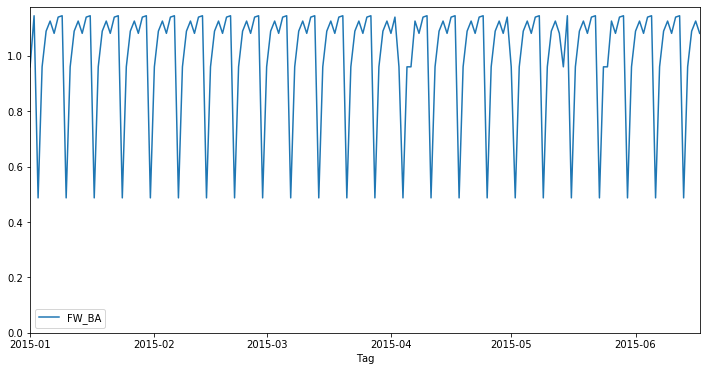

In [37]:
df_gas_slp[['FW_BA']].head(168).plot(figsize=(12,6), ylim = 0)

# Auxiliary Functions

### Function efficiency_enhancement()
- Read and return the efficienicy enhancement for power or gas consumption for the current *base year* relative to 2015 per branch. 2015 is the benchmark because specific consumption is based on data from this year.

In [17]:
df = data.efficiency_enhancement('power')

In [18]:
df

WZ
1     1
2     1
3     1
5     1
6     1
     ..
95    1
96    1
97    1
98    1
99    1
Name: Effizienzsteigerungsrate Strom, Length: 88, dtype: int64

## Function t_allo()
- returns the daily allocation temperature for each NUTS-3 district (401 NUTS-3 districts in Germany)
- t_allo is calculated according to the publication of BDEW on Gas SLPs, p. 22


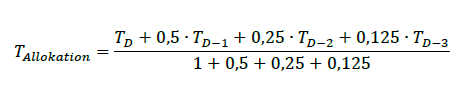

 
!Line 204 --> Temperatur aus zwei Landkreisen zusammengelegt


In [17]:
df_t_allo = data.t_allo()
df_t_allo.head()

disaggregator.data: INFO     Dropping old NUTS-v2013 regions.


ags_lk,1001,1002,1003,1004,1051,1053,9774,1054,1055,1056,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
2015-01-01 00:00:00+01:00,4.846667,3.386667,2.443333,2.976667,3.960000,2.133333,-1.713333,5.140000,2.370000,2.473333,...,2.166667,0.000000,0.183333,1.586667,0.163333,1.223333,0.466667,0.960000,0.880000,1.003333
2015-01-02 00:00:00+01:00,5.768980,5.064014,4.500544,4.950204,5.335918,4.378571,-3.273061,6.098095,4.485442,4.642313,...,2.270408,-0.052721,-1.472449,1.651429,-1.357211,1.178027,0.902381,0.744082,0.752653,1.369116
2015-01-03 00:00:00+01:00,5.804445,5.265073,4.791282,5.188426,5.744036,4.738095,-1.168857,6.325832,4.771270,4.904902,...,2.575482,0.247927,-1.319332,2.087247,-1.349501,1.546128,1.402642,1.080165,1.217804,1.949469
2015-01-04 00:00:00+01:00,5.126411,4.549156,4.080490,4.507839,5.210513,4.188763,-0.824925,5.840115,4.098049,4.424334,...,2.485728,0.269494,-1.262638,1.930961,-1.297350,1.491930,1.266486,0.980766,1.177418,1.799501
2015-01-05 00:00:00+01:00,4.562905,4.086507,3.618178,3.990390,4.976216,3.786529,-0.693200,5.565019,3.668190,4.110900,...,2.396788,0.290311,-1.546013,1.873229,-1.623932,1.477079,1.305384,0.962028,1.274715,1.840803


## Function h_value()
- returns a DataFrame with normalized h-values for a given district and gas load profile. normalization is necessary for later use as disaggregation parameter from yearly to daily gas consumption, but can also be turned off
- h-values depend on the allocation temperature and determine the daily gas consumption

In [111]:
from disaggregator import config, data, spatial, temporal
df_h_value = data.h_value(slp = 'KO', districts = ['11000'])
df_h_value.head()

disaggregator.data: INFO     Dropping old NUTS-v2013 regions.


ags_lk,11000
2015-01-01 00:00:00+01:00,0.005148
2015-01-02 00:00:00+01:00,0.005072
2015-01-03 00:00:00+01:00,0.004716
2015-01-04 00:00:00+01:00,0.004881
2015-01-05 00:00:00+01:00,0.005046


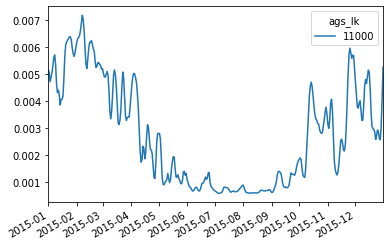

In [112]:
df_h_value.plot()